This notebook contains info for the machine learning algorithm component of a simple time series prediction app.  Outputs are currently in matplotlib format an image of the data itself along with a time series curve fit to the data as well as the prediction.

App scenario: A user travels to the website and inputs:
1.  a csv of the time series they wish to make a prediction for

They press 'RUN' and out pops on the screen
- an image of their data
- the model fit to this data along with its prediction - we preset a whole number indicating the number of units in time (e.g., 4, 6, etc.,) we predict

We could show user other things e.g., measurment error of final predictor.

The next two Python cells contain examples for using the current time series prediction class, located in MySeries.py.  The remainder of the notebook describes the mathematical background for the machine learning algorithm used.  

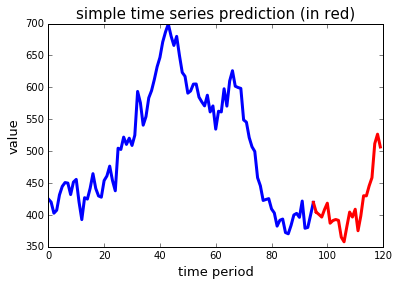

In [130]:
from MySeries import MySeries
%matplotlib inline
apple = MySeries()
apple.load_data('apple_prices.csv')    # load in a csv - remember no header!
apple.train_model()                    # train the model to fit the data
apple.make_predictions()               # make predictions using the trained model
apple.plot_all()                       # plot the series and prediction

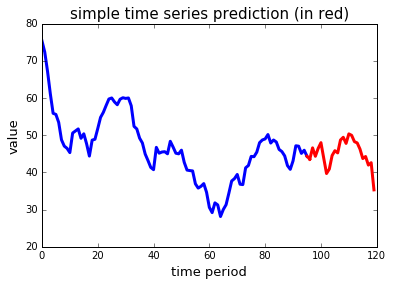

In [132]:
from MySeries import MySeries
%matplotlib inline
oil = MySeries()
oil.load_data('oil_prices.csv')      # load in a csv - remember no header!
oil.train_model()                    # train the model to fit the data
oil.make_predictions()               # make predictions using the trained model
oil.plot_all()                       # plot the series and prediction

### 1.  Training the model 

Lets call the input series $\left\{ y_{t}\right\} _{t=1}^{N}$.  That is, a set of $N$ datapoints ordered in time.  We chose a value $P$ for the number of time units to train on.

To make the prediction we model each point $y_n$ as a linear combination of its previous $T$ values.  That is

$w_{0}+y_{n-1}w_{1}+y_{n-2}w_{2}+\cdots y_{n-T}w_{T}=y_{n}$

Note we cannot do this for those values of $n < P$ since there are not $P$ values in the series preceeding it.  

To tune the $P+1$ parameters $\left\{ w_{0},w_{1},...,w_{P}\right\} $ properly means to do so such that the equality above holds for as well as possible for all the points (that is $t=P...N$).  To get at this desire we form a Least Squares cost function - by squaring the difference between both sides of the above and summing over the points, giving

$g(w_{0},..,w_{P})=\sum_{t=P}^N (w_{0}+y_{n-1}w_{1}+y_{n-2}w_{2}+\cdots y_{n-P}w_{P}-y_{n})^{2}$

Now then, if we can tune the weights to make this quantity as small as possible (to minimie it), then the original equalities will roughly hold, and so we will have roughly tuned the parameters correctly.

### The algorithm - math

Since the model (in the first equation) is linear in its parameters we can tune the parameters by solving a linear system.  To do this it is convinent to write the function $g$ more compactly using vector notation.  Denoting

$\mathbf{w}=\left[w_{0},w_{1},\cdots w_{P}\right]^{T}$

and 

$\mathbf{x}_{n}=\left[1,\,y_{n-1},\,y_{n-2},\,\cdots,\,y_{n-P}\right]^{T}$

You can then write the cost function $g$ as 

$g(\mathbf{w})=\sum_{n=P}^N(\mathbf{x}_{n}^{T}\mathbf{w}-y_{n})^{2}$

Now, setting the gradient of $g$ to zero (mathematically $\nabla g\left(\mathbf{w}\right)=\mathbf{0}_{\left(P+1\right)\times1}$ we have a single linear system in our $P+1$ variables that - when solved - properly tunes the weights.



$(\sum_{n=P}^N \mathbf{x}_{n}^{\,}\mathbf{x}_{n}^{T}  )\mathbf{w}=\sum_{n=P}^N \mathbf{x}_{n}y_{n}$

There is a linear systems solver in numpy that we can use solve this system.  

For convenience we'll write this linear system as

$\mathbf{A}\mathbf{w}=\mathbf{b}$

where

$\mathbf{A} = \sum_{n=P}^N \mathbf{x}_{n}^{\,}\mathbf{x}_{n}^{T}$

$\mathbf{b} = \sum_{n=P}^N \mathbf{x}_{n}y_{n}$


### 2.  Using the learned model to predict

To predict the $(N+1)^{th}$ entry $y_{N+1}$ in the series we use the trained weights $\hat{\mathbf{w}}$ and model, and have

$\mathbf{x}_{N+1}^{T}\mathbf{w} = y_{N+1}$

To construct the $(N+2)^{th}$ prediction $y_{N+2}$ we repeat a similar calculation using the previous prediction.  Setting 

$\mathbf{x}_{N+2}=\left[1,\,y_{N+1},\,y_{N},\,\cdots,\,y_{N+1-P)}\right]^{T}$

we predict $y_{N+2}$ as

$\mathbf{x}_{N+2}^{T}\mathbf{w} = y_{N+2}$

To predict $y_{N+3}$ and so on we repeat the similar pattern.